# <center> UE22CS342AA2 - Data Analytics </center>

# <center> Worksheet 4a: Collaborative Filtering </center>

<center> Designed by Amritha GK, PESU-25 </center>

<br>

- Student name: Neha Nair
- SRN: PES2UG22CS348
- Section: F

Assume there exists a parallel universe and you are a Data Analyst intern at Parallel Earth Amazon. The company wants to test product recommendations and improve their product catalogue. For this exercise, you are tasked with the analysis of User Ratings for Health and Personal Care Products.



# Details of the dataset:

### Columns in this dataset:

- 'sl': serial number of records

- 'user_id': Unique identifier for users

- 'title': title of the review

- 'text': body of the review

- 'asin': Amazon Standard Identification Number (ASIN) is a ten-digit alphanumeric code that identifies products on Amazon. It's unique for each product and is assigned when you create a new product in Amazon's catalog.

- 'parent_asin': The abstraction of the variations is called the parent ASIN. It can't be purchased and hence is not associated with an offer.

- 'rating': Product rating (out of 5)

- 'timestamp': In milliseconds

- 'helpful_vote': Interactions of other users with this review

- 'verified_purchase': (True or False) Amazon has verified that the person writing the review purchased the product from Amazon, and didn't receive the product at a discount.



## Some conceptual information:

### Utility Matrix

This is an m x n matrix (m users, n items) that consists the rating / preference of each user for each item.

It is usually quite sparse as the rating values are usually present for very few user-item pairs.



### Neighborhood-based methods

The main idea with neighborhood-based methods is to leverage either user-user similarity or item-item similarity to make recommendations. These methods assume that similar users tend to have similar behaviors when rating items.

There are mainly two types:



1. **User-based collaborative filtering**: based on similarity between users.

2. **Item-based collaborative filtering**: based on similarity between items.



### Matrix factorization/decomposition

The utility matrix can be represented as a product of two smaller matrices, say U and V, representing users and items respectively.

## Install the required packages

In [5]:
install.packages("recommenderlab")
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load the required packages

In [6]:
library(dplyr)

library(tidyr)   

library(recommenderlab)
library(ggplot2)

## Load and create dataframe

In [14]:
data <- read.csv('/kaggle/input/health-and-personal-care-dataset/Worksheet-4a_Health_And_Personal_Care_Dataset.csv')

## Perform EDA and Preprocess the dataset to the required format

### 1 point

State some observations that you made after performing EDA.

Feel free to remove any columns you think are not necessary for the following problems.

Some hints to help you get started:
- Check the summary, number of rows and columns
- Remove null values and duplicates
- Obtain a subset of the dataset with the required columns only.
- Create the utility matrix


In [15]:
summary(data)
dim(data)  # Check dimensions
str(data)  # Structure of the data

# Remove rows with NA values
data <- na.omit(data)

# Remove duplicate rows
data <- distinct(data)

       X          user_id             title               text          
 Min.   :   0   Length:4276        Length:4276        Length:4276       
 1st Qu.:1129   Class :character   Class :character   Class :character  
 Median :2278   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2284                                                           
 3rd Qu.:3437                                                           
 Max.   :4589                                                           
     asin           parent_asin            rating        timestamp        
 Length:4276        Length:4276        Min.   :1.000   Min.   :1.345e+12  
 Class :character   Class :character   1st Qu.:4.000   1st Qu.:1.593e+12  
 Mode  :character   Mode  :character   Median :5.000   Median :1.613e+12  
                                       Mean   :4.285   Mean   :1.610e+12  
                                       3rd Qu.:5.000   3rd Qu.:1.634e+12  
                                       

[1] 4276   10

'data.frame':	4276 obs. of  10 variables:
 $ X                : int  2809 2549 2593 3280 2178 397 711 1091 2302 3460 ...
 $ user_id          : chr  "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" ...
 $ title            : chr  "The Soap Petals Are A Fun Addition" "Add More Water Than Suggested" "Not very comfortable." "Smells Intoxicating!" ...
 $ text             : chr  "I'm using to purchasing bath bombs for nearly $6-10 a bomb at major bath and spa stores, so these bombs are $18"| __truncated__ "We live in the south. You need all the help when you live in the south in the summer. The humidity and heat are"| __truncated__ "This is difficult to give a good review because there are way more negatives than positives. I mean, it's great"| __truncated__ "Oh man these smell so good! Lemongrass is my favorite scent when it comes to essential oils and I enjoy looking"| __truncated__ ...
 $ asin             : chr  "B0

In [30]:
library(reshape2)

# Create the utility matrix using dcast
utility_matrix <- dcast(data, user_id ~ asin, value.var = "rating", fill = NA)

# Convert to matrix format for recommenderlab
rating_matrix <- as(as.matrix(utility_matrix[,-1]), "realRatingMatrix")
rownames(rating_matrix) <- utility_matrix$user_id  # Ensure user IDs align as row names
rating_matrix_dense <- as(rating_matrix, "matrix")
head(rating_matrix_dense)

,B00009QJW6,B000F95A4W,B000G2BESO,B000OUY4T4,B000WFG9JO,B002DXU1FQ,B004AWD1CS,B004C7MTLA,B0052V1R3G,B0056PTIP2,⋯,B0BCDSDSD1,B0BDK41HB8,B0BDM8DHM4,B0BG2GPWWD,B0BLXBWDPM,B0BM9555TP,B0BMVHY6LB,B0BMXF2RGQ,B0BTYSML8S,B0C2PXG21N
AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
AE2O2C43KTYO4LXXGZWJZLE67GBQ,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AE2YCIHHZH57ABZB7EWDTCF3WPKA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AE3335XF4PMHSXKTW5B7N7EALG3Q,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AE3IGJOPJP6LFXEJTIXFJVSJLILA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AE3KLVXGZPANXE5XLXYKHTVAZ3FQ,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Problem 1

### User-based collaborative filtering: 3 points (2+1)

1. As part of the test run of the new business strategy, you are supposed to pick a user (consider the user with user_id:"AE2O2C43KTYO4LXXGZWJZLE67GBQ") and recommend 5 products based on other similar users.

Remember to exclude the product(s) purchased by this user.

2. Which similarity metric did you use? Why?

In [33]:
get_user_recommendations <- function(user_id, rating_matrix) {
    if(!(user_id %in% rownames(rating_matrix))) {
    stop("User ID not found in dataset")
  }
  
  # Get user ratings
  user_ratings <- as(rating_matrix[user_id, ], "matrix")
  
  # Calculate similarities with other users
  similarities <- similarity(rating_matrix[user_id, ], rating_matrix, method = "cosine")
  similarities <- as.vector(similarities)
  
  # Get top similar users (excluding the user themselves)
  n_similar <- 10
  similar_users <- head(order(similarities, decreasing = TRUE)[-1], n_similar)
  
  # Get mean ratings from similar users
  similar_users_ratings <- colMeans(as(rating_matrix[similar_users, ], "matrix"), na.rm = TRUE)
  
  # Remove items the user has already rated
  rated_items <- which(!is.na(user_ratings))
  similar_users_ratings[rated_items] <- NA
  
  #top 5 recommendations
  recommendations <- head(order(similar_users_ratings, decreasing = TRUE), 5) 
  return(colnames(rating_matrix)[recommendations])
}

tryCatch({
  # Get recommendations
  recommendations <- get_user_recommendations(target_user, rating_matrix)
  print(recommendations)
}, error = function(e) {
  print(paste("Error in Problems 1 & 2:", e$message))
})

[1] "B06XH42HGT" "B07CVNF4Z1" "B07W9BKMK8" "B084RLGNM2" "B085V5VZFY"


## Problem 2

### 1 point

Consider the same user as in the previous problem.

Let's assume this user decides to purchase the first product among the recommendations above. What rating is the user likely to give to this product?

In [35]:
# Your code here
predict_rating <- function(user_id, product_id, rating_matrix) {
  # Check if user and product exist in the matrix
  if(!(user_id %in% rownames(rating_matrix))) {
    stop("User ID not found")
  }
  if(!(product_id %in% colnames(rating_matrix))) {
    stop("Product ID not found")
  }
  
  # Calculate similarities using cosine similarity
  similarities <- as.vector(similarity(rating_matrix[user_id, ], rating_matrix, method = "cosine"))
  
  # Get top similar users (excluding the target user itself)
  n_similar <- 10
  similar_users <- head(order(similarities, decreasing = TRUE)[-1], n_similar)
  
  # Get ratings for the specific product from similar users
  ratings <- as(rating_matrix[similar_users, product_id], "matrix")
  
  # Calculate weighted average of ratings
  valid_ratings <- !is.na(ratings)
  if(sum(valid_ratings) == 0) return(NA)
  weighted_rating <- weighted.mean(
    ratings[valid_ratings],
    similarities[similar_users][valid_ratings]
  )
  return(round(weighted_rating, 2))
}

if(length(recommendations) > 0) {
  pred_rating <- predict_rating(target_user, recommendations[1], rating_matrix)
  print(pred_rating)
}

[1] 5


## Problem 3

### Item-based Collaborative Filtering: 2 points

Use the item-based method from the package "recommenderlab" to recommend top-5 products to the user "AE5IMGWRBJA7JQFBQTBK25HDYGVA".

In [41]:
# Specify the target user
target_user <- "AE5IMGWRBJA7JQFBQTBK25HDYGVA"

# Create item-based recommender
item_rec <- Recommender(rating_matrix, method = "IBCF")

# Get top 5 recommendations for the target user
pred <- predict(item_rec, rating_matrix[target_user, ], n = 5)
item_recommendations <- as(pred, "list")[[1]]
print(item_recommendations)

[1] "B0077L8YFI" "B01JH4QWL0" "B01K0EBHR0" "B073NS2GG3" "B0742KMZ5J"


## Problem 4

### Long-tail problem: 2 points

1. Plot a graph of the products and their frequencies(in descending order of frequency). State your observations about the graph. 

2. Suggest 2 ways to overcome the long-tail problem of recommender systems.



List the links to the resources you referred to for your answer.

  0%  20%  40%  60%  80% 100% 
   1    3    4    5    7   14 


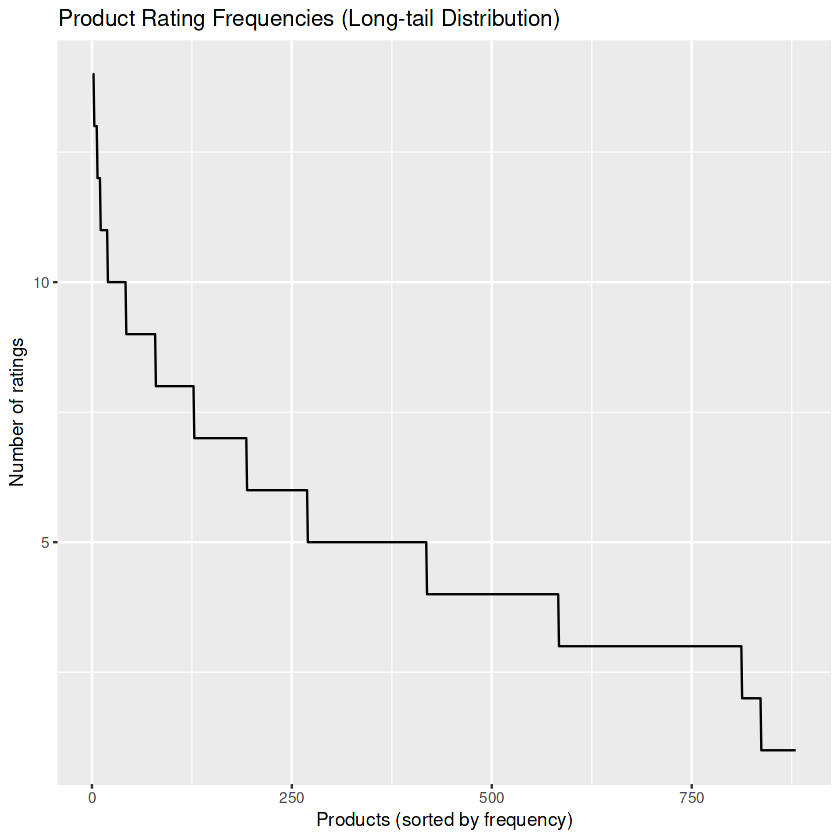

In [43]:
# Your code here
# Calculate product frequencies from dense matrix
rating_matrix_dense <- as(rating_matrix, "matrix")
product_frequencies <- colSums(!is.na(rating_matrix_dense))
product_freq_sorted <- sort(product_frequencies, decreasing = TRUE)

# Create long-tail plot
long_tail_plot <- ggplot(
 data.frame(freq = product_freq_sorted), 
 aes(x = seq_along(freq), y = freq)) + geom_line() +
 labs(title = "Product Rating Frequencies (Long-tail Distribution)",
   x = "Products (sorted by frequency)",   y = "Number of ratings")

print(long_tail_plot)

# Calculate percentiles
percentiles <- quantile(product_frequencies, probs = seq(0, 1, 0.2))
print(percentiles)

Two ways to overcome the long-tail problem in recommender systems:

1. Hierarchical Clustering and Aggregation:
* Group similar low-frequency items
* Create meta-categories for sparse items
* Leverage collective information of similar products
* Reduces sparsity by clustering similar items


2. Hybrid Recommendation Approaches:
* Combine collaborative filtering with content-based filtering
* Use auxiliary information (product attributes, metadata)
* Incorporate external knowledge bases
* Reduces dependency on historical interaction data

Resources:

* https://arxiv.org/abs/1810.01154
* https://www.sciencedirect.com/
* https://dl.acm.org/doi/10.1145/3178876.3186161


## Problem 5

### 1 point

Do you see any shortcomings of Collaborative Filtering due to the dataset or other factors? What modifications would you introduce to achieve better results?

*Your answer here*
1. Cold Start Problem: Limited recommendations for new users or items.
* Fix: Use hybrid models combining collaborative and content-based filtering.

2. Matrix Sparsity: High number of missing values reduces accuracy.
* Fix: Apply matrix factorization like SVD to fill gaps.

3. Limited Features: Dataset lacks product categories or demographics.
* Fix: Add contextual and product-specific attributes.

4. No Temporal Context: Ignores time-based changes in preferences.
* Fix: Use time-aware models for dynamic recommendations.

Kudos on completing the task! Hope you could learn a few new things along the way.

Here's an interesting approach that uses LLMs and the FAISS library to create a movie recommender system in python: https://www.youtube.com/watch?v=epidA1fBFtI&t=122s

Do explore the above resource as it might have a bunch of new techniques in store for you.